In [0]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Datamining/TextMining/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
!cp "/content/drive/My Drive/Datamining/TextMining/Notebooks/functions.py" .
import functions as f
import importlib
importlib.reload(f)
f.v()

2020-05-31 10:45


In [0]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from keras.initializers import Constant
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using TensorFlow backend.


True

In [0]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
df = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1mE-QcKMxy70Xt5OoVb8s0GqjS7jQiBD12WzxtmcNQck/edit#gid=1204809874');
df

,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,0.0,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,1.0,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,1.0,1.0
3,Pretty cool concept. 👍 $CHR #crypto #cryptocu...,True,NaN,NaN
4,"Crypto Market Hits $200 Billion, Bitcoin Ralli...",True,NaN,NaN
...,...,...,...,...
995,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,0.0,1.0
996,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,0.0,0.0
997,The last time BTC closed above 12k for the wee...,False,0.0,1.0
998,https://t.co/o5jXwqEdbn is for #sale!#domain #...,True,NaN,NaN


In [0]:
df = df[df['is_spam'] == False]
df['is_news'] = df['is_news'].apply(lambda x: True if x == 1.0 else False)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,False,False,1.0
1,China Authorities Probe Alleged Illegal Bitcoi...,False,True,-1.0
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,False,True,1.0
5,Study Finds Most Ransomware Solutions Just Pay...,False,True,1.0
6,"Oh man that $6,400 resistance was really tough...",False,False,-1.0
...,...,...,...,...
993,@ThomasSchuIz Been doing both....luv it! Let m...,False,False,1.0
994,@girevik_ Which parameters for network effect ...,False,False,1.0
995,@CNBC @CNBCMakeIt He says if you make 70K a ye...,False,False,1.0
996,https://t.co/U6p7FgOdd8 via @BitcoinEcho,False,False,0.0


In [0]:
df_val = f.loadSampleDataSetFromSpread(gc, 'https://docs.google.com/spreadsheets/d/1G0sY49Ct5AU3OAV-kVU1SSJP9_-ci8N0aCvX00e2Gkg/edit#gid=2038236874')
df_val

,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,0.0,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,0.0,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,0.0,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,0.0,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,0.0,1.0
...,...,...,...,...
495,#Blockchain #Crypto #Bitcoin #Ethereum #Tradin...,True,NaN,NaN
496,@CalvinAyre according to your mother bitcoin i...,False,0.0,1.0
497,Sold this put last week when bitcoin was above...,False,0.0,1.0
498,Block 598628 Hash: 0x...0df6063fdfd137f13322f9...,True,NaN,NaN


In [0]:
df_val = df_val[df_val['is_spam'] == False]
df_val['is_news'] = df_val['is_news'].apply(lambda x: True if x == 1.0 else False)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,is_spam,is_news,sentiment
0,#BTC #Bitcoin to 7500$ and after this back to ...,False,False,1.0
1,@APompliano @McDonalds What is the cost of tra...,False,False,0.0
2,"Selling at 6,500USD. Bye Bitcoin Co. Ltd. htt...",False,False,-1.0
3,Lets play a game as we wait for Bakkt 10K BTC ...,False,False,1.0
4,@GoonAlerts_ Favorite coin @sentivate $SNTVT I...,False,False,1.0
...,...,...,...,...
491,PURA – Puration To Introduce New CBD Infused C...,False,False,0.0
492,##Bitcoin Showing Signs of Forming a Long-Term...,False,False,1.0
493,@Crypto_Guy_UK you do understand China are inv...,False,False,-1.0
496,@CalvinAyre according to your mother bitcoin i...,False,False,1.0


# Preparacion de datos para las RNN

In [0]:
x_dev_text = df['text'].apply(f.normalizeForTokenization)
y_dev = df['sentiment'].astype(int) + 1 # Sumo 1 para que las categorías sean 0 1 2 en lugar de -1 0 1
x_test_text = df_val['text'].apply(f.normalizeForTokenization)
y_test = df_val['sentiment'].astype(int) + 1 # Sumo 1 para que las categorías sean 0 1 2 en lugar de -1 0 1

In [0]:
vocab_size = 10000+1
embedding_dim = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
validation_size = 0.2

# Seteamos max_length teniendo en cuenta el largo promedio de los tweets
max_length = 50

In [0]:
x_train_text, x_validation_text, y_train, y_validation = train_test_split(x_dev_text, y_dev, test_size = validation_size, random_state=1234)

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train_text)
x_train = tokenizer.texts_to_sequences(x_train_text)
x_validation = tokenizer.texts_to_sequences(x_validation_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

In [0]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_validation = pad_sequences(x_validation, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Naive Bayes

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_dev_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_test_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_dev)
pred = NB_model.predict(x_validation_NB)

In [0]:
{
    'f1' : f1_score(y_test, pred, average='weighted'),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred, average='weighted'),
    'precision': precision_score(y_test, pred, average='weighted')
}

{'accuracy': 0.4307692307692308,
 'f1': 0.3667751732566991,
 'precision': 0.38410658307210027,
 'recall': 0.4307692307692308}

In [0]:
# Hay que hacerlo multiclase
# tf.math.confusion_matrix(labels=y_test, predictions=pred)

Por las dudas pruebo NB validando contra "validación" (en lugar de test)

In [0]:
count_vect = CountVectorizer(tokenizer=word_tokenize, max_features=5000)
x_train_NB = count_vect.fit_transform(x_train_text) # cuenta frecuencia de tokens y define el diccionario
x_validation_NB = count_vect.transform(x_validation_text) # cuenta frecuencia de tokens existentes en el diccionario

clf = MultinomialNB(alpha=1) # alpha es el smoothing parameter
NB_model = clf.fit(x_train_NB, y_train)
pred = NB_model.predict(x_validation_NB)

In [0]:
{
    'f1' : f1_score(y_validation, pred, average='weighted'),
    'accuracy': accuracy_score(y_validation, pred),
    'recall': recall_score(y_validation, pred, average='weighted'),
    'precision': precision_score(y_validation, pred, average='weighted')
}

{'accuracy': 0.5419847328244275,
 'f1': 0.5022221607173081,
 'precision': 0.4688784497944803,
 'recall': 0.5419847328244275}

# One hot encoding de Y




In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_validation_cat = tf.keras.utils.to_categorical(y_validation, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# RNN

In [0]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_10 (GRU)                 (None, 128)               165120    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
Total params: 3,166,853
Trainable params: 3,166,853
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_gru.fit(x_train, y_train_cat, batch_size=100, epochs=50, validation_data=(x_validation, y_validation_cat))

Epoch 1/50
6/6 [==============================] - 1s 87ms/step - loss: 1.0751 - accuracy: 0.4218 - val_loss: 1.0196 - val_accuracy: 0.4885
Epoch 2/50
6/6 [==============================] - 0s 35ms/step - loss: 1.0678 - accuracy: 0.4218 - val_loss: 1.0205 - val_accuracy: 0.4885
Epoch 3/50
6/6 [==============================] - 0s 34ms/step - loss: 1.0569 - accuracy: 0.4294 - val_loss: 1.0358 - val_accuracy: 0.4885
Epoch 4/50
6/6 [==============================] - 0s 36ms/step - loss: 1.0568 - accuracy: 0.4351 - val_loss: 1.0246 - val_accuracy: 0.4809
Epoch 5/50
6/6 [==============================] - 0s 37ms/step - loss: 1.0488 - accuracy: 0.4351 - val_loss: 1.0109 - val_accuracy: 0.4885
Epoch 6/50
6/6 [==============================] - 0s 33ms/step - loss: 1.0510 - accuracy: 0.4351 - val_loss: 1.0014 - val_accuracy: 0.4885
Epoch 7/50
6/6 [==============================] - 0s 34ms/step - loss: 1.0436 - accuracy: 0.4370 - val_loss: 1.0143 - val_accuracy: 0.5038
Epoch 8/50
6/6 [===========

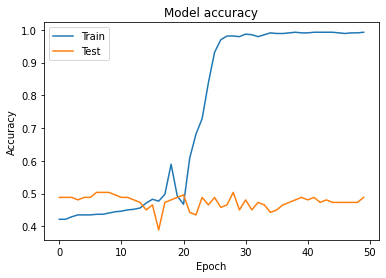

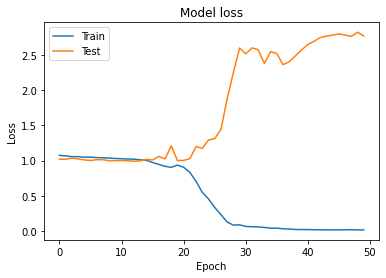

In [0]:
plot_history(history)

In [0]:
pred = model_gru.predict(x_test)
pred = [tf.argmax(x).numpy() for x in pred]
{
    'f1' : f1_score(y_test, pred, average='weighted'),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred, average='weighted'),
    'precision': precision_score(y_test, pred, average='weighted')
}

{'accuracy': 0.40615384615384614,
 'f1': 0.3690299740877187,
 'precision': 0.41262177490214874,
 'recall': 0.40615384615384614}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[13, 56, 22],
       [ 8, 86, 26],
       [ 9, 72, 33]], dtype=int32)>

# RNN Bidireccional

In [0]:
model_bigru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_bigru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           330240    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
history = model_bigru.fit(x_train, y_train_cat, batch_size=100, epochs=15, validation_data=(x_validation, y_validation_cat))

Epoch 1/15
6/6 [==============================] - 1s 233ms/step - loss: 1.0867 - accuracy: 0.4008 - val_loss: 1.0614 - val_accuracy: 0.3740
Epoch 2/15
6/6 [==============================] - 0s 52ms/step - loss: 1.0563 - accuracy: 0.4008 - val_loss: 1.0519 - val_accuracy: 0.3740
Epoch 3/15
6/6 [==============================] - 0s 52ms/step - loss: 1.0403 - accuracy: 0.4008 - val_loss: 1.0285 - val_accuracy: 0.3740
Epoch 4/15
6/6 [==============================] - 0s 50ms/step - loss: 0.9913 - accuracy: 0.4008 - val_loss: 0.9998 - val_accuracy: 0.3817
Epoch 5/15
6/6 [==============================] - 0s 52ms/step - loss: 0.8957 - accuracy: 0.5496 - val_loss: 1.0660 - val_accuracy: 0.4885
Epoch 6/15
6/6 [==============================] - 0s 51ms/step - loss: 0.7760 - accuracy: 0.6011 - val_loss: 1.0164 - val_accuracy: 0.5191
Epoch 7/15
6/6 [==============================] - 0s 49ms/step - loss: 0.6715 - accuracy: 0.6870 - val_loss: 1.0483 - val_accuracy: 0.5573
Epoch 8/15
6/6 [==========

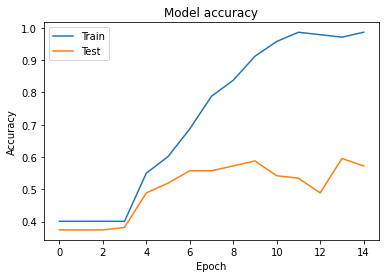

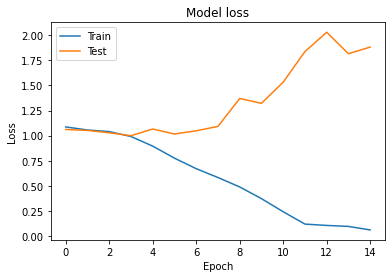

In [0]:
plot_history(history)

In [0]:
pred = model_bigru.predict(x_test)
pred = [tf.argmax(x).numpy() for x in pred]
{
    'f1' : f1_score(y_test, pred, average='weighted'),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred, average='weighted'),
    'precision': precision_score(y_test, pred, average='weighted')
}

{'accuracy': 0.39076923076923076,
 'f1': 0.350588242480674,
 'precision': 0.40620354682028686,
 'recall': 0.39076923076923076}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[10, 16, 65],
       [ 7, 34, 79],
       [13, 18, 83]], dtype=int32)>

# Embedding preentrenado

In [0]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

#load model
w2v_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

--2020-05-31 19:22:49--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.82.251
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.82.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  13.4MB/s    in 2m 1s   

2020-05-31 19:24:51 (13.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# RNN con embedding preentrenado

In [0]:
model_gru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_gru_pre.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru_pre.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
gru_9 (GRU)                  (None, 128)               165120    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 3,166,853
Trainable params: 3,166,853
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_gru_pre.fit(x_train, y_train_cat, batch_size=100, epochs=30, validation_data=(x_validation, y_validation_cat))

Epoch 1/30
6/6 [==============================] - 1s 105ms/step - loss: 1.0936 - accuracy: 0.3740 - val_loss: 1.0798 - val_accuracy: 0.3435
Epoch 2/30
6/6 [==============================] - 0s 36ms/step - loss: 1.0650 - accuracy: 0.4256 - val_loss: 1.0563 - val_accuracy: 0.3435
Epoch 3/30
6/6 [==============================] - 0s 36ms/step - loss: 1.0410 - accuracy: 0.4218 - val_loss: 1.0546 - val_accuracy: 0.3435
Epoch 4/30
6/6 [==============================] - 0s 35ms/step - loss: 1.0327 - accuracy: 0.4294 - val_loss: 1.0505 - val_accuracy: 0.3359
Epoch 5/30
6/6 [==============================] - 0s 34ms/step - loss: 1.0220 - accuracy: 0.4370 - val_loss: 1.0387 - val_accuracy: 0.3511
Epoch 6/30
6/6 [==============================] - 0s 36ms/step - loss: 1.0142 - accuracy: 0.4370 - val_loss: 1.0352 - val_accuracy: 0.3511
Epoch 7/30
6/6 [==============================] - 0s 34ms/step - loss: 1.0045 - accuracy: 0.4447 - val_loss: 1.0458 - val_accuracy: 0.3435
Epoch 8/30
6/6 [==========

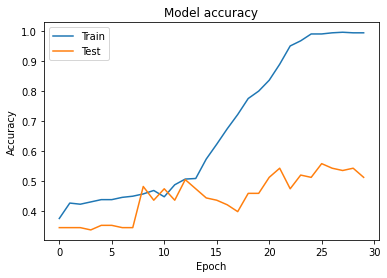

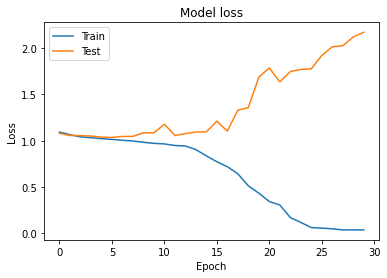

In [0]:
plot_history(history)

In [0]:
pred = model_gru_pre.predict(x_test)
pred = [tf.argmax(x).numpy() for x in pred]
{
    'f1' : f1_score(y_test, pred, average='weighted'),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred, average='weighted'),
    'precision': precision_score(y_test, pred, average='weighted')
}

{'accuracy': 0.36923076923076925,
 'f1': 0.33632571398392624,
 'precision': 0.3967085641090993,
 'recall': 0.36923076923076925}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 7, 31, 53],
       [ 3, 53, 64],
       [ 5, 49, 60]], dtype=int32)>

In [0]:
# Dejo comentado el código para guardar y cargar
#modelFileName = 'gru_pre_2020-05-30_1355'
#modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()

# RNN Bidireccional con embedding preentrenado

In [0]:
model_bigru_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer=Constant(embedding_matrix), trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences = True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_bigru_pre.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bigru_pre.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 300)           3000300   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 256)           330240    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [0]:
history = model_bigru_pre.fit(x_train, y_train_cat, batch_size=100, epochs=20, validation_data=(x_validation, y_validation_cat))

Epoch 1/20
6/6 [==============================] - 1s 216ms/step - loss: 1.0918 - accuracy: 0.3321 - val_loss: 1.0369 - val_accuracy: 0.3740
Epoch 2/20
6/6 [==============================] - 0s 53ms/step - loss: 1.0306 - accuracy: 0.4599 - val_loss: 0.9932 - val_accuracy: 0.4656
Epoch 3/20
6/6 [==============================] - 0s 51ms/step - loss: 0.9960 - accuracy: 0.5038 - val_loss: 1.0011 - val_accuracy: 0.5038
Epoch 4/20
6/6 [==============================] - 0s 51ms/step - loss: 0.9510 - accuracy: 0.5553 - val_loss: 0.9902 - val_accuracy: 0.5038
Epoch 5/20
6/6 [==============================] - 0s 49ms/step - loss: 0.9002 - accuracy: 0.5687 - val_loss: 0.9681 - val_accuracy: 0.5191
Epoch 6/20
6/6 [==============================] - 0s 50ms/step - loss: 0.8245 - accuracy: 0.6126 - val_loss: 0.9748 - val_accuracy: 0.5725
Epoch 7/20
6/6 [==============================] - 0s 50ms/step - loss: 0.6915 - accuracy: 0.7118 - val_loss: 0.9664 - val_accuracy: 0.5878
Epoch 8/20
6/6 [==========

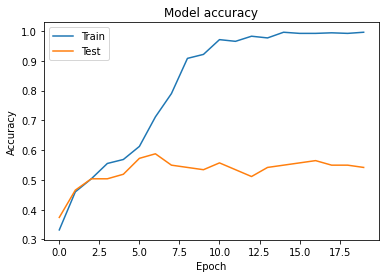

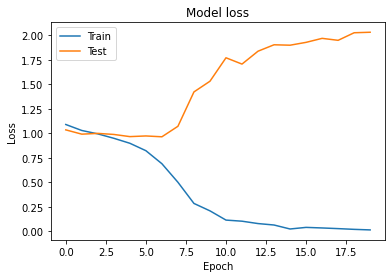

In [0]:
plot_history(history)

In [0]:
pred = model_bigru_pre.predict(x_test)
pred = [tf.argmax(x).numpy() for x in pred]
{
    'f1' : f1_score(y_test, pred, average='weighted'),
    'accuracy': accuracy_score(y_test, pred),
    'recall': recall_score(y_test, pred, average='weighted'),
    'precision': precision_score(y_test, pred, average='weighted')
}

{'accuracy': 0.47384615384615386,
 'f1': 0.4377434114619853,
 'precision': 0.5075720102057435,
 'recall': 0.47384615384615386}

In [0]:
tf.math.confusion_matrix(labels=y_test, predictions=pred)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 27, 52],
       [ 3, 58, 59],
       [ 6, 24, 84]], dtype=int32)>

In [0]:
# Guardo el modelo que dio mejor hasta ahora
modelFileName = 'news_gru_pre_2020-05-30_2323'
modelFullPath = path + 'Modelos/' + modelFileName
#model_gru_pre.save(modelFullPath)
#new_model = tf.keras.models.load_model(modelFullPath)
#new_model.summary()